In [26]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [27]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/GISS-E2-1_diag_2014(0319).csv')

In [28]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [29]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [30]:
data['a'] = 2*data['k_ch3o2_ch3o2']
data['b'] = data['k_no_ch3o2']*data['no_mole']
data['c'] = -data['lossch4_mole']

In [31]:
data['ch3o2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [32]:
data['ratio_ch3o2_oh'] = data['ch3o2_mole']/data['oh_mole']
data['ratio_ch3o2_oh'].describe()

count    9.436100e+05
mean     1.115250e+03
std      9.033030e+03
min      8.288791e-01
25%      6.849811e+01
50%      1.896716e+02
75%      5.540107e+02
max      3.892236e+06
Name: ratio_ch3o2_oh, dtype: float64

In [33]:
data['P2'] = data['k_no_ch3o2']*data['no_mole']*data['ch3o2_mole']
data['P2_frac'] = data['P2']/data['o3prod_mole']
data['P2_frac'].describe()

count    9.436100e+05
mean     5.625627e-01
std      7.339529e-01
min      8.102616e-12
25%      2.146991e-01
50%      4.265162e-01
75%      7.073975e-01
max      6.507238e+01
Name: P2_frac, dtype: float64

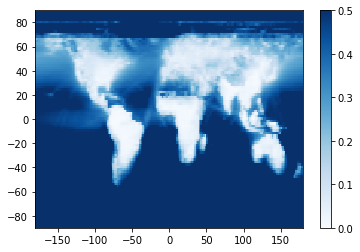

In [34]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
#data_land = data_land[data_land['P2_frac'] <1]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [35]:
data_mean['P2_frac'].describe()

count    16200.000000
mean         0.571971
std          0.405562
min          0.003206
25%          0.257827
50%          0.512735
75%          0.824355
max          3.488252
Name: P2_frac, dtype: float64

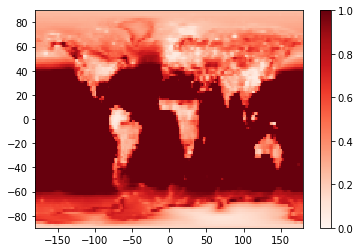

In [36]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ch3o2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=1, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [37]:
data['P3'] = data['o3prod_mole'] - data['P1'] - data['P2']
data['P3_frac'] = data['P3']/data['o3prod_mole']
data['P3_frac'].describe()

count    943610.000000
mean          0.022855
std           0.750761
min         -64.227035
25%          -0.212200
50%           0.028588
75%           0.395026
max           1.000000
Name: P3_frac, dtype: float64

In [38]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [39]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']/10
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [40]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    943610.000000
mean          1.414291
std           1.286534
min           0.000036
25%           0.615206
50%           1.122166
75%           1.893094
max          50.596208
Name: ratio_P1_P2, dtype: float64

In [41]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    943610.000000
mean          2.484100
std           3.075072
min           0.098275
25%           1.054103
50%           1.619962
75%           2.832707
max         158.344904
Name: ratio_P5_P6, dtype: float64

In [42]:
data = data.drop(['a','b','c','country_y'], axis=1)
data = data.rename(columns={'country_x':'country'})
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,P2,P2_frac,P3,P3_frac,P5,P5_frac,P6,P6_frac,ratio_P1_P2,ratio_P5_P6
0,1.0,-89.0,1.0,911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,113162.395778,0.627695,-107447.564696,-0.595996,127081.94422,2.104654,14662.332946,0.242829,1.542628,8.667239
1,3.0,-89.0,1.0,2911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,113162.395778,0.627695,-107447.564696,-0.595996,127081.94422,2.104654,14662.332946,0.242829,1.542628,8.667239
2,5.0,-89.0,1.0,4911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,113162.395778,0.627695,-107447.564696,-0.595996,127081.94422,2.104654,14662.332946,0.242829,1.542628,8.667239
3,7.0,-89.0,1.0,6911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,113162.395778,0.627695,-107447.564696,-0.595996,127081.94422,2.104654,14662.332946,0.242829,1.542628,8.667239
4,9.0,-89.0,1.0,8911.0,4.129741e-08,2.993728e-13,1.002680e-13,0.0,0.0,245.94757,...,113162.395778,0.627695,-107447.564696,-0.595996,127081.94422,2.104654,14662.332946,0.242829,1.542628,8.667239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,NaN
971996,-7.0,89.0,60.0,-6911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,NaN
971997,-5.0,89.0,60.0,-4911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,NaN
971998,-3.0,89.0,60.0,-2911.0,3.921430e-08,0.000000e+00,1.640510e-15,0.0,0.0,240.98276,...,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,NaN


In [18]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/GISS-E2-1_diag_2014(0320).csv', index = False)

In [43]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [44]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.33
P2 fraction:    0.41
P3 fraction:    0.26
P5 fraction:    0.59
P6 fraction:    0.24
P1:P2 ratio:    1.75
P5:P6 ratio:    2.45
HO₂:OH ratio:   131.2
CH₃O₂:OH ratio: 76.3
